In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats
import matplotlib.patches as mpatches


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
file_path = '/content/drive/MyDrive/Colab Notebooks/Final Project /Stock Prices - S&P 500.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6-Dec-24,"44,824.30","44,923.74","44,596.46","44,642.52","44,642.52","466,918,860"
1,1-Dec-24,"44,925.86","45,073.63","44,574.78","44,642.52","44,642.52","2,347,540,000"
2,27-Nov-24,"44,837.80","45,003.10","44,690.20","44,722.06","44,722.06","451,361,098"
3,1-Nov-24,"41,869.82","45,003.06","41,647.30","44,722.06","44,722.06","9,827,060,000"
4,1-Oct-24,"42,262.97","43,325.09","41,704.63","41,763.46","41,763.46","7,172,340,000"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [18]:
date_close_data = data[['Date', 'Close']]
print(date_close_data.head())

        Date      Close
0   6-Dec-24  44,642.52
1   1-Dec-24  44,642.52
2  27-Nov-24  44,722.06
3   1-Nov-24  44,722.06
4   1-Oct-24  41,763.46


# **S&P 500**

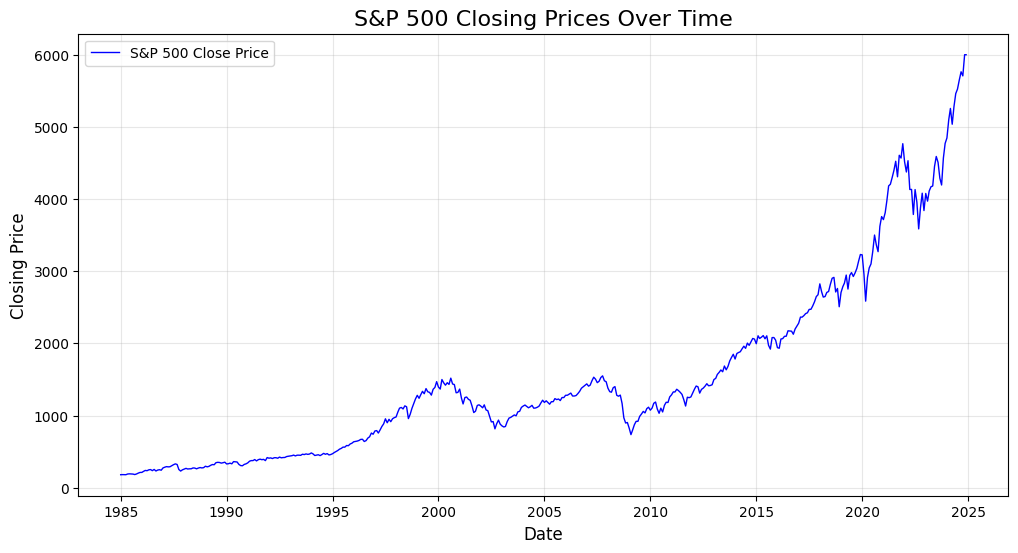

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
data['Close'] = data['Close'].str.replace(',', '').astype(float)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='S&P 500 Close Price', color='blue', linewidth=1)
plt.title('S&P 500 Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

election_data = [
    {'Year': 1988, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 1992, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 1996, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 2000, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2004, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2008, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2012, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2016, 'President': 'Trump', 'Party': 'Republican'},
    {'Year': 2020, 'President': 'Biden', 'Party': 'Democrat'},
    {'Year': 2024, 'President': 'Trump', 'Party': 'Republican'}
]

if data['Close'].dtype != 'float64':
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
    data['Close'] = data['Close'].str.replace(',', '').astype(float)

data.set_index('Date', inplace=True)

election_changes = []
for year_info in election_data:
    year = year_info['Year']
    party = year_info['Party']
    president = year_info['President']

    try:
        october_last = data[(data.index.year == year) & (data.index.month == 10)]['Close'].iloc[-1]
        november_last = data[(data.index.year == year) & (data.index.month == 11)]['Close'].iloc[-1]

        percent_change = ((november_last - october_last) / october_last) * 100

        election_changes.append({
            'Year': year,
            'Percent Change': percent_change,
            'President': president,
            'Party': party
        })
    except IndexError:
        print(f"No data available for {year} in October or November.")

changes_df = pd.DataFrame(election_changes)

fig = px.bar(
    changes_df,
    x='Year',
    y='Percent Change',
    text = 'President',
    color='Percent Change',
    color_continuous_scale=['yellow', 'purple'],
    labels={'Percent Change': 'Percent Change (%)', 'Year': 'Election Year'},
    title='S&P 500 Percent Change (Oct to Nov) in Election Years'
)

party_colors = {'Republican': 'red', 'Democrat': 'blue'}
shapes = []
for i, row in changes_df.iterrows():
    party = row['Party']
    start_year = row['Year']
    shapes.append(
        dict(
            type='rect',
            x0=start_year - 0.5,
            x1=start_year + 0.5,
            y0=0,
            y1=1,
            xref='x',
            yref='paper',
            fillcolor=party_colors[party],
            opacity=0.1,
            line=dict(width=0)
        )
    )

fig.update_layout(
    shapes=shapes,
    xaxis_title='Election Year',
    yaxis_title='Percent Change (%)',
)

fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br><b>Percent Change:</b> %{y:.2f}%<br><b>President:</b> %{text}'
)

fig.show()
fig.write_html("fig1.html")

from google.colab import files
files.download("fig1.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd
import plotly.express as px

election_data = [
    {'Year': 1988, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 1992, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 1996, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 2000, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2004, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2008, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2012, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2016, 'President': 'Trump', 'Party': 'Republican'},
    {'Year': 2020, 'President': 'Biden', 'Party': 'Democrat'},
    {'Year': 2024, 'President': 'Trump', 'Party': 'Republican'}
]

if data['Close'].dtype != 'float64':
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
    data['Close'] = data['Close'].str.replace(',', '').astype(float)

data.set_index('Date', inplace=True)

election_changes = []
for year_info in election_data:
    year = year_info['Year']
    party = year_info['Party']
    president = year_info['President']
    try:

        november_last = data[(data.index.year == year) & (data.index.month == 11)]['Close'].iloc[-1]
        december_last = data[(data.index.year == year) & (data.index.month == 12)]['Close'].iloc[-1]


        percent_change = ((december_last - november_last) / november_last) * 100

        election_changes.append({
            'Year': year,
            'Percent Change': percent_change,
            'President': president,
            'Party': party
        })
    except IndexError:
        print(f"No data available for {year} in October or November.")

changes_df = pd.DataFrame(election_changes)

fig = px.bar(
    changes_df,
    x='Year',
    y='Percent Change',
    text = 'President',
    color='Percent Change',
    color_continuous_scale=['yellow', 'purple'],
    labels={'Percent Change': 'Percent Change (%)', 'Year': 'Election Year'},
    title='S&P 500 Percent Change (Nov to Dec) in Election Years'
)

party_colors = {'Republican': 'red', 'Democrat': 'blue'}
shapes = []
for i, row in changes_df.iterrows():
    party = row['Party']
    start_year = row['Year']
    shapes.append(
        dict(
            type='rect',
            x0=start_year - 0.5,
            x1=start_year + 0.5,
            y0=0,
            y1=1,
            xref='x',
            yref='paper',
            fillcolor=party_colors[party],
            opacity=0.1,
            line=dict(width=0)
        )
    )

fig.update_layout(
    shapes=shapes,
    xaxis_title='Election Year',
    yaxis_title='Percent Change (%)',
)

fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br><b>Percent Change:</b> %{y:.2f}%<br><b>President:</b> %{text}'
)

fig.show()
fig.write_html("fig2.html")

from google.colab import files
files.download("fig2.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **DOW JONES**

In [19]:
file_path2 = '/content/drive/MyDrive/Colab Notebooks/Final Project /Stock Prices - DJI.csv'
data = pd.read_csv(file_path2)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6-Dec-24,"44,824.30","44,923.74","44,596.46","44,642.52","44,642.52","466,918,860"
1,1-Dec-24,"44,925.86","45,073.63","44,574.78","44,642.52","44,642.52","2,347,540,000"
2,27-Nov-24,"44,837.80","45,003.10","44,690.20","44,722.06","44,722.06","451,361,098"
3,1-Nov-24,"41,869.82","45,003.06","41,647.30","44,722.06","44,722.06","9,827,060,000"
4,1-Oct-24,"42,262.97","43,325.09","41,704.63","41,763.46","41,763.46","7,172,340,000"


In [ ]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [12]:
date_close_data = data[['Date', 'Close']]
print(date_close_data.head())

        Date      Close
0   6-Dec-24  44,642.52
1   1-Dec-24  44,642.52
2  27-Nov-24  44,722.06
3   1-Nov-24  44,722.06
4   1-Oct-24  41,763.46


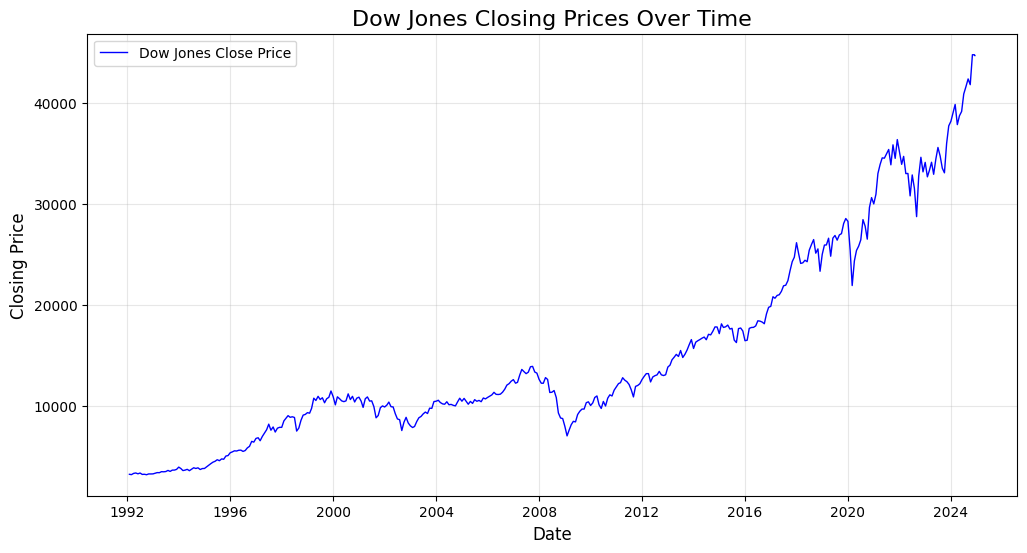

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
data['Close'] = data['Close'].str.replace(',', '').astype(float)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Dow Jones Close Price', color='blue', linewidth=1)

plt.title('Dow Jones Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

### Note that Yahoo only has the DJI data starting from 1992

In [ ]:
import pandas as pd
import plotly.express as px

election_data = [
    {'Year': 1988, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 1992, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 1996, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 2000, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2004, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2008, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2012, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2016, 'President': 'Trump', 'Party': 'Republican'},
    {'Year': 2020, 'President': 'Biden', 'Party': 'Democrat'},
    {'Year': 2024, 'President': 'Trump', 'Party': 'Republican'}
]

if data['Close'].dtype != 'float64':
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
    data['Close'] = data['Close'].str.replace(',', '').astype(float)

data.set_index('Date', inplace=True)

election_changes = []
for year_info in election_data:
    year = year_info['Year']
    party = year_info['Party']
    president = year_info['President']
    try:
        october_last = data[(data.index.year == year) & (data.index.month == 10)]['Close'].iloc[-1]
        november_last = data[(data.index.year == year) & (data.index.month == 11)]['Close'].iloc[-1]

        percent_change = ((november_last - october_last) / october_last) * 100

        election_changes.append({
            'Year': year,
            'Percent Change': percent_change,
            'President': president,
            'Party': party
        })
    except IndexError:
        print(f"No data available for {year} in October or November.")

changes_df = pd.DataFrame(election_changes)

fig = px.bar(
    changes_df,
    x='Year',
    y='Percent Change',
    text = 'President',
    color='Percent Change',
    color_continuous_scale=['yellow', 'purple'],
    labels={'Percent Change': 'Percent Change (%)', 'Year': 'Election Year'},
    title='Dow Jones Percent Change (Oct to Nov) in Election Years'
)

party_colors = {'Republican': 'red', 'Democrat': 'blue'}
shapes = []
for i, row in changes_df.iterrows():
    party = row['Party']
    start_year = row['Year']
    shapes.append(
        dict(
            type='rect',
            x0=start_year - 0.5,
            x1=start_year + 0.5,
            y0=0,
            y1=1,
            xref='x',
            yref='paper',
            fillcolor=party_colors[party],
            opacity=0.1,
            line=dict(width=0)
        )
    )

fig.update_layout(
    shapes=shapes,
    xaxis_title='Election Year',
    yaxis_title='Percent Change (%)',
)

fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br><b>Percent Change:</b> %{y:.2f}%<br><b>President:</b> %{text}'
)

fig.show()
fig.write_html("fig3.html")

from google.colab import files
files.download("fig3.html")

No data available for 1988 in October or November.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import pandas as pd
import plotly.express as px

election_data = [
    {'Year': 1988, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 1992, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 1996, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 2000, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2004, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2008, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2012, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2016, 'President': 'Trump', 'Party': 'Republican'},
    {'Year': 2020, 'President': 'Biden', 'Party': 'Democrat'},
    {'Year': 2024, 'President': 'Trump', 'Party': 'Republican'}
]

data = data.reset_index()

if data['Close'].dtype != 'float64':
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
    data['Close'] = data['Close'].str.replace(',', '').astype(float)

data.set_index('Date', inplace=True)

election_changes = []
for year_info in election_data:
    year = year_info['Year']
    party = year_info['Party']
    president = year_info['President']

    try:
        november_last = data[(data.index.year == year) & (data.index.month == 11)]['Close'].iloc[-1]
        december_last = data[(data.index.year == year) & (data.index.month == 12)]['Close'].iloc[-1]


        percent_change = ((december_last - november_last) / november_last) * 100

        election_changes.append({
            'Year': year,
            'Percent Change': percent_change,
            'President': president,
            'Party': party
        })
    except IndexError:
        print(f"No data available for {year} in November or December.")


changes_df = pd.DataFrame(election_changes)

fig = px.bar(
    changes_df,
    x='Year',
    y='Percent Change',
    text = 'President',
    color='Percent Change',
    color_continuous_scale=['yellow', 'purple'],
    labels={'Percent Change': 'Percent Change (%)', 'Year': 'Election Year'},
    title='Dow Jones Percent Change (Nov to Dec) in Election Years'
)

party_colors = {'Republican': 'red', 'Democrat': 'blue'}
shapes = []
for i, row in changes_df.iterrows():
    party = row['Party']
    start_year = row['Year']
    shapes.append(
        dict(
            type='rect',
            x0=start_year - 0.5,
            x1=start_year + 0.5,
            y0=0,
            y1=1,
            xref='x',
            yref='paper',
            fillcolor=party_colors[party],
            opacity=0.1,
            line=dict(width=0)
        )
    )

fig.update_layout(
    shapes=shapes,
    xaxis_title='Election Year',
    yaxis_title='Percent Change (%)',
)

fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br><b>Percent Change:</b> %{y:.2f}%<br><b>President:</b> %{text}'
)

fig.show()
fig.write_html("fig4.html")

from google.colab import files
files.download("fig4.html")

No data available for 1988 in November or December.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **NASDAQ**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
file_path3 = '/content/drive/MyDrive/Colab Notebooks/Final Project /Stock Prices - NASDAQ.csv'
data = pd.read_csv(file_path3)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,6-Dec-24,"19,744.00","19,863.14","19,734.42","19,859.77","19,859.77","6,305,565,000"
1,1-Dec-24,"19,255.43","19,863.15","19,255.43","19,859.77","19,859.77","34,262,840,000"
2,27-Nov-24,"19,133.00","19,133.10","18,937.20","19,060.48","19,060.48","5,158,760,000"
3,1-Nov-24,"18,189.67","19,366.07","18,112.83","19,060.48","19,060.48","142,472,460,000"
4,1-Oct-24,"18,154.94","18,785.50","17,767.79","18,095.15","18,095.15","132,373,190,000"


In [ ]:
print(data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [15]:
date_close_data = data[['Date', 'Close']]
print(date_close_data.head())

        Date      Close
0   6-Dec-24  19,859.77
1   1-Dec-24  19,859.77
2  27-Nov-24  19,060.48
3   1-Nov-24  19,060.48
4   1-Oct-24  18,095.15


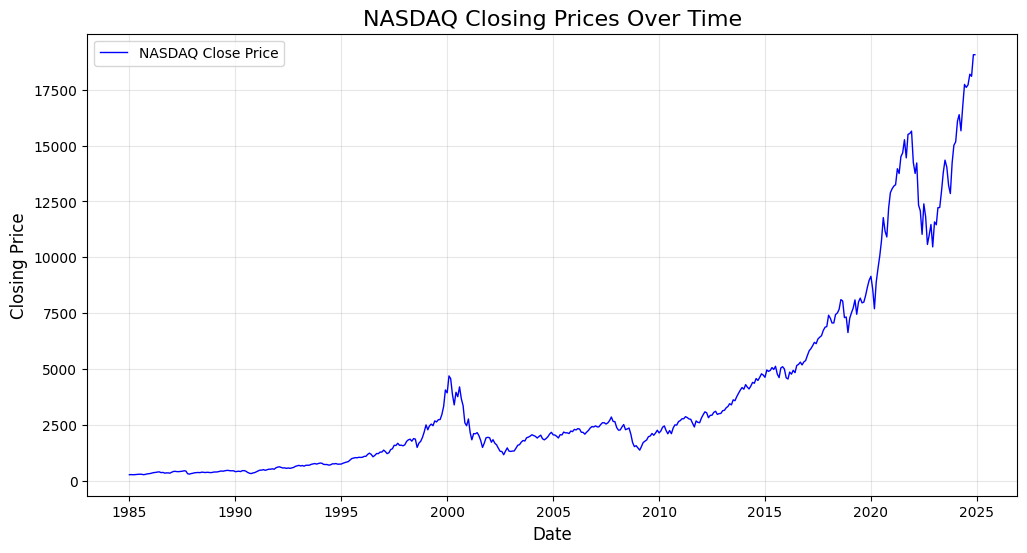

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
data['Close'] = data['Close'].str.replace(',', '').astype(float)

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='NASDAQ Close Price', color='blue', linewidth=1)
plt.title('NASDAQ Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

election_data = [
    {'Year': 1992, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 1996, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 2000, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2004, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2008, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2012, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2016, 'President': 'Trump', 'Party': 'Republican'},
    {'Year': 2020, 'President': 'Biden', 'Party': 'Democrat'},
    {'Year': 2024, 'President': 'Trump', 'Party': 'Republican'}
]

if data['Close'].dtype != 'float64':
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
    data['Close'] = data['Close'].str.replace(',', '').astype(float)

data.set_index('Date', inplace=True)

election_changes = []
for year_info in election_data:
    year = year_info['Year']
    party = year_info['Party']
    president = year_info['President']
    try:
        october_last = data[(data.index.year == year) & (data.index.month == 10)]['Close'].iloc[-1]
        november_last = data[(data.index.year == year) & (data.index.month == 11)]['Close'].iloc[-1]

        percent_change = ((november_last - october_last) / october_last) * 100

        election_changes.append({
            'Year': year,
            'Percent Change': percent_change,
            'President': president,
            'Party': party
        })
    except IndexError:
        print(f"No data available for {year} in October or November.")

changes_df = pd.DataFrame(election_changes)

fig = px.bar(
    changes_df,
    x='Year',
    y='Percent Change',
    text = 'President',
    color='Percent Change',
    color_continuous_scale=['yellow', 'purple'],
    labels={'Percent Change': 'Percent Change (%)', 'Year': 'Election Year'},
    title='NASDAQ Percent Change (Oct to Nov) in Election Years'
)

party_colors = {'Republican': 'red', 'Democrat': 'blue'}
shapes = []
for i, row in changes_df.iterrows():
    party = row['Party']
    start_year = row['Year']
    shapes.append(
        dict(
            type='rect',
            x0=start_year - 0.5,
            x1=start_year + 0.5,
            y0=0,
            y1=1,
            xref='x',
            yref='paper',
            fillcolor=party_colors[party],
            opacity=0.1,
            line=dict(width=0)
        )
    )

fig.update_layout(
    shapes=shapes,
    xaxis_title='Election Year',
    yaxis_title='Percent Change (%)',
)

fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br><b>Percent Change:</b> %{y:.2f}%<br><b>President:</b> %{text}'
)

fig.show()
fig.write_html("fig5.html")

from google.colab import files
files.download("fig5.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
import pandas as pd
import plotly.express as px

election_data = [
    {'Year': 1988, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 1992, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 1996, 'President': 'Clinton', 'Party': 'Democrat'},
    {'Year': 2000, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2004, 'President': 'Bush', 'Party': 'Republican'},
    {'Year': 2008, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2012, 'President': 'Obama', 'Party': 'Democrat'},
    {'Year': 2016, 'President': 'Trump', 'Party': 'Republican'},
    {'Year': 2020, 'President': 'Biden', 'Party': 'Democrat'},
    {'Year': 2024, 'President': 'Trump', 'Party': 'Republican'}
]

data = data.reset_index()
if data['Close'].dtype != 'float64':
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
    data['Close'] = data['Close'].str.replace(',', '').astype(float)

data.set_index('Date', inplace=True)

election_changes = []
for year_info in election_data:
    year = year_info['Year']
    try:
        november_last = data[(data.index.year == year) & (data.index.month == 11)]['Close'].iloc[-1]
        december_last = data[(data.index.year == year) & (data.index.month == 12)]['Close'].iloc[-1]

        percent_change = ((december_last - november_last) / november_last) * 100

        election_changes.append({
            'Year': year,
            'Percent Change': percent_change,
            'President': year_info['President'],
            'Party': year_info['Party']
        })
    except IndexError:
        print(f"No data available for {year} in November or December.")


changes_df = pd.DataFrame(election_changes)

fig = px.bar(
    changes_df,
    x='Year',
    y='Percent Change',
    text = 'President',
    color='Percent Change',
    color_continuous_scale=['yellow', 'purple'],
    labels={'Percent Change': 'Percent Change (%)', 'Year': 'Election Year'},
    title='NASDAQ Percent Change (Nov to Dec) in Election Years'
)

party_colors = {'Republican': 'red', 'Democrat': 'blue'}
shapes = []
for i, row in changes_df.iterrows():
    party = row['Party']
    start_year = row['Year']
    shapes.append(
        dict(
            type='rect',
            x0=start_year - 0.5,
            x1=start_year + 0.5,
            y0=0,
            y1=1,
            xref='x',
            yref='paper',
            fillcolor=party_colors[party],
            opacity=0.1,
            line=dict(width=0)
        )
    )

fig.update_layout(
    shapes=shapes,
    xaxis_title='Election Year',
    yaxis_title='Percent Change (%)',
)

fig.update_traces(
    hovertemplate='<b>Year:</b> %{x}<br><b>Percent Change:</b> %{y:.2f}%<br><b>President:</b> %{text}'
)

fig.show()
fig.write_html("fig6.html")

from google.colab import files
files.download("fig6.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig.write_html("final_project.html")

from google.colab import files
files.download("final_project.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>